In [203]:
import warnings

import numpy as np
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

In [204]:
import pandas as pd


github_data_url= "https://raw.githubusercontent.com/devzohaib/Simple-Linear-Regression/master/tvmarketing.csv"
dataset = pd.read_csv(github_data_url)

print(dataset)


        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


In [205]:
print(((dataset.isna().sum())/dataset.shape[0])*100)

TV       0.0
Sales    0.0
dtype: float64


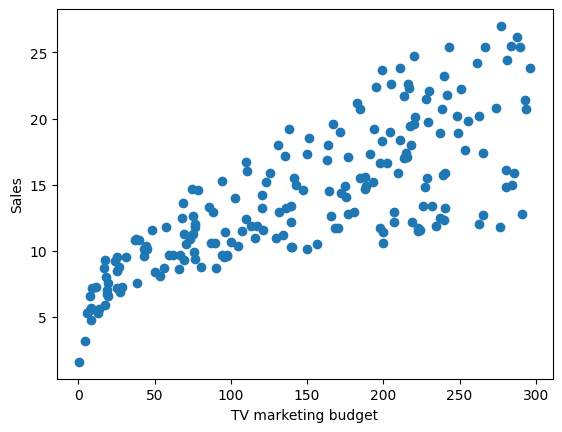

In [206]:
plt.scatter(dataset['TV'],dataset['Sales'])
plt.xlabel('TV marketing budget')
plt.ylabel('Sales')
plt.show()

we can see in the scatter plot that the sales are increasing with the budget

In [207]:
mean_budget = dataset['TV'].mean()
deviation_budget = dataset['TV'].std()
mean_sales = dataset['Sales'].mean()
deviation_sales = dataset['Sales'].std()
print('mean budget =',mean_budget)
print('mean sales =',mean_sales)
print('deviation budget =',deviation_budget)
print('deviation sales =',deviation_sales)

mean budget = 147.0425
mean sales = 14.0225
deviation budget = 85.85423631490808
deviation sales = 5.217456565710478


In [208]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [209]:
def normalisation(column):
  min = column.min()
  max = column.max()
  return (column - min) / (max-min)

X_norm = normalisation(dataset['TV'])
Y_norm = normalisation(dataset['Sales'])
print(X_norm,Y_norm)

0      0.775786
1      0.148123
2      0.055800
3      0.509976
4      0.609063
         ...   
195    0.126818
196    0.316199
197    0.596212
198    0.956713
199    0.782550
Name: TV, Length: 200, dtype: float64 0      0.807087
1      0.346457
2      0.303150
3      0.665354
4      0.444882
         ...   
195    0.236220
196    0.318898
197    0.440945
198    0.940945
199    0.464567
Name: Sales, Length: 200, dtype: float64


In [210]:
tv_train,tv_test = train_test_split(X_norm, test_size=0.2, random_state=13)
sales_train,sales_test = train_test_split(Y_norm, test_size=0.2, random_state=13)
sales_train

125    0.354331
68     0.681102
69     0.814961
108    0.145669
131    0.437008
         ...   
98     0.937008
16     0.429134
74     0.606299
176    0.732283
82     0.381890
Name: Sales, Length: 160, dtype: float64

In [211]:
def hypothesis(X, Y, learning_rate, iteration):
  m = Y.size
  X = np.c_[np.ones(X.shape[0]), X]
  theta = np.zeros((2,1))

  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta


  return theta


In [212]:
X = tv_train.values.reshape(-1, 1)
Y = sales_train.values.reshape(-1, 1)
theta = hypothesis(X,Y,0.1,10000)
theta

array([[0.22294378],
       [0.53956825]])

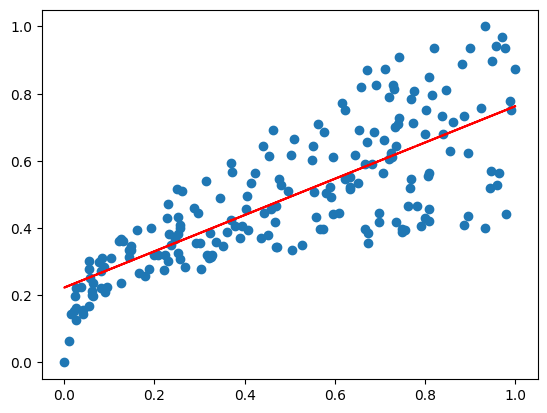

In [213]:
plt.scatter(X_norm,Y_norm)
y_values = theta[0] + theta[1] * X_norm
plt.plot(X_norm, y_values, label='Linear Regression Line', color='red')
plt.show()

In [214]:
x_values = tv_test.values.reshape(-1, 1)
y_values_actual = sales_test.values.reshape(-1, 1)
X = np.c_[np.ones(x_values.shape[0]), x_values]

y_values_pred = np.dot(X, theta)

mse = np.mean((y_values_pred - y_values_actual)**2)
abslt = np.mean(np.abs(y_values_pred - y_values_actual))
print(f'Mean Squared Error: {mse}')
print('absolute error:',abslt)
print("Test Accuracy is :", (1- abslt)*100, "%")

Mean Squared Error: 0.01682402210958443
absolute error: 0.1065043902791635
Test Accuracy is : 89.34956097208365 %


### New section

In [215]:
import warnings

import numpy as np
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score as cross_val_score_inbuilt

from statistics import mean
from statistics import stdev
import math

In [216]:
import requests


data_url = "http://lib.stat.cmu.edu/datasets/boston"


response = requests.get(data_url)
data_text = response.text
df = pd.read_csv(StringIO(data_text), delim_whitespace=True,skiprows = 22, header=None)


dataset = pd.DataFrame(columns=list(range(1, 12)) + [12, 13, 14])


for i in range(0, len(df), 2):
    row_1 = df.iloc[i].values
    row_2 = df.iloc[i + 1].values
    combined_row = list(row_1) + list(row_2)
    combined_row = combined_row[:14]
    dataset.loc[len(dataset)] = combined_row

column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
dataset.columns = column_names
print(dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [217]:
print(((dataset.isna().sum())/dataset.shape[0])*100)

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64


<ipython-input-218-2040a17cf447>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax = axes[0, 0], data = dataset, x = "CRIM", y = "MEDV", palette = "bwr")
<ipython-input-218-2040a17cf447>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax = axes[0, 1], data = dataset, x = "ZN", y = "MEDV", palette = "bwr")
<ipython-input-218-2040a17cf447>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax = axes[0, 2], data = dataset, x = "INDUS", y = "MEDV", palette = "bwr")
<ipython-input-218-2040a17cf447>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax = axes[1, 0], data = dataset, x = "CHAS", y = "MEDV", palette = "bwr")
<ipython-input-218-2040a17cf447>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(ax = axes[1, 1], data = dataset, x = "NOX", y = "M

<Axes: xlabel='LSTAT', ylabel='MEDV'>

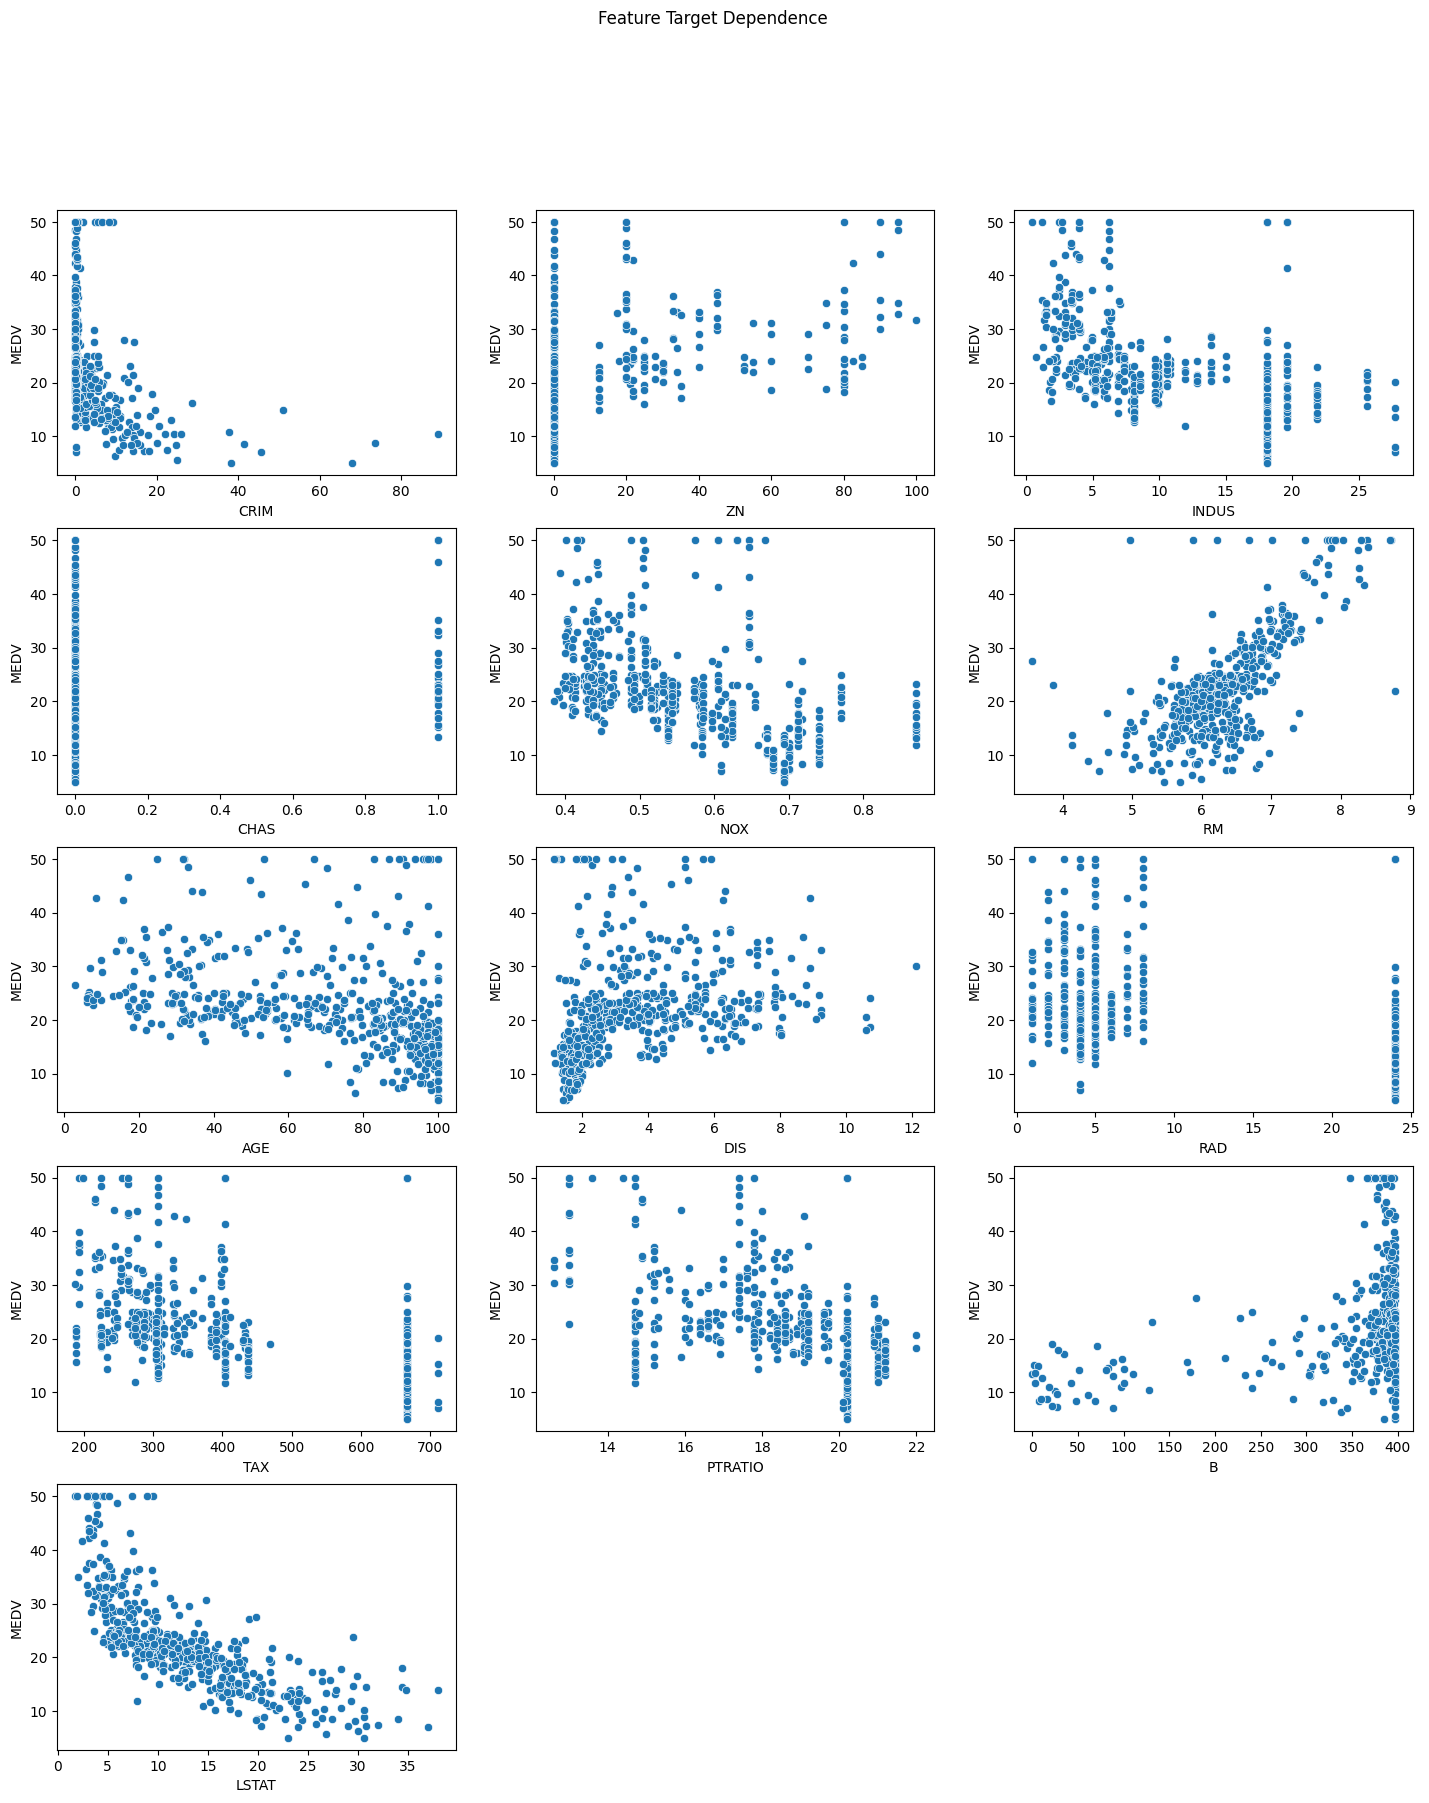

In [218]:
figure, axes = plt.subplots(5, 3, figsize = (17.5, 20))
figure.delaxes(axes[4][2])
figure.delaxes(axes[4][1])
figure.suptitle("Feature Target Dependence")
sns.scatterplot(ax = axes[0, 0], data = dataset, x = "CRIM", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[0, 1], data = dataset, x = "ZN", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[0, 2], data = dataset, x = "INDUS", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[1, 0], data = dataset, x = "CHAS", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[1, 1], data = dataset, x = "NOX", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[1, 2], data = dataset, x = "RM", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[2, 0], data = dataset, x = "AGE", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[2, 1], data = dataset, x = "DIS", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[2, 2], data = dataset, x = "RAD", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[3, 0], data = dataset, x = "TAX", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[3, 1], data = dataset, x = "PTRATIO", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[3, 2], data = dataset, x = "B", y = "MEDV", palette = "bwr")
sns.scatterplot(ax = axes[4, 0], data = dataset, x = "LSTAT", y = "MEDV", palette = "bwr")

In [219]:
X = dataset.drop('MEDV',axis=1)
Y = dataset['MEDV']
column_names = ['MEDV']
Y.columns = column_names
print(Y)

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

X = X.apply(min_max_normalize, axis=0)
min_val_y = Y.min()
max_val_y = Y.max()
Y = (Y - min_val_y) / (max_val_y - min_val_y)

print(X)
print(Y)



0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64
         CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0

In [220]:
f_train,f_test = train_test_split(X, test_size=0.2, random_state=13)
m_train,m_test = train_test_split(Y, test_size=0.2, random_state=13)
print("Shape of f_train :", f_train.shape)
print("Shape of m_train :", m_train.shape)
print("Shape of f_test :", f_test.shape)
print("Shape of m_test :", m_test.shape)

Shape of f_train : (404, 13)
Shape of m_train : (404,)
Shape of f_test : (102, 13)
Shape of m_test : (102,)


In [221]:
f_train = np.vstack((np.ones((f_train.shape[0], )), f_train.T)).T
f_test = np.vstack((np.ones((f_test.shape[0], )), f_test.T)).T

In [222]:
print("Shape of f_train :", f_train.shape)
print("Shape of m_train :", m_train.shape)
print("Shape of f_test :", f_test.shape)
print("Shape of m_test :", m_test.shape)

Shape of f_train : (404, 14)
Shape of m_train : (404,)
Shape of f_test : (102, 14)
Shape of m_test : (102,)


In [223]:
X.shape[1]
print(m_train.size)

404


In [224]:
def model(X, Y, learning_rate, iteration):
  m = Y.size

  theta = np.zeros((X.shape[1], 1))
  cost_list = []


  for i in range(iteration):
    y_pred = np.dot(X, theta)
    cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
    d_theta = (1/m)*np.dot(X.T, y_pred - Y)
    theta = theta - learning_rate*d_theta

    cost_list.append(cost)

    if(i%(iteration/10) == 0):
      print("Cost is :", cost)



  return theta,cost_list



In [225]:
X_train = f_train
Y_train = m_train.to_numpy().reshape(-1, 1)

theta, cost_list = model(X_train, Y_train, 0.005, 10000)
print(theta)

Cost is : 0.09862406796235179
Cost is : 0.012504388363772493
Cost is : 0.010251837069183459
Cost is : 0.009021203551220778
Cost is : 0.008182803459310155
Cost is : 0.0075893358665197475
Cost is : 0.007158793308810034
Cost is : 0.006839754110226261
Cost is : 0.006598856714023899
Cost is : 0.006413860054789864
[[ 0.2478587 ]
 [-0.06861118]
 [ 0.09102543]
 [-0.0539139 ]
 [ 0.08784819]
 [-0.01596603]
 [ 0.43296327]
 [ 0.02929126]
 [-0.0857141 ]
 [ 0.07055165]
 [-0.07190693]
 [-0.14721409]
 [ 0.13996532]
 [-0.33731499]]


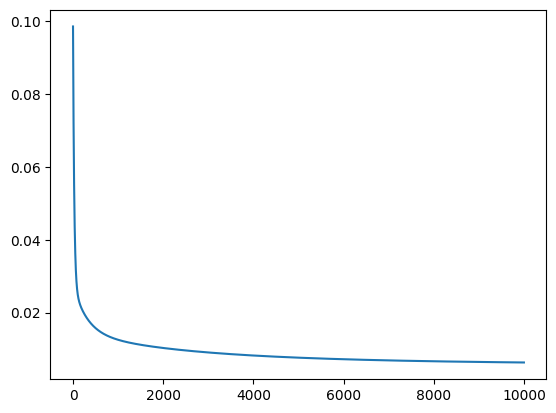

In [226]:
rng = np.arange(0, 10000)
plt.plot(rng, cost_list)
plt.show()

In [227]:
y_pred = np.dot(f_test, theta)
m_test = m_test.values.reshape(-1, 1)
error = (1/f_test.shape[0])*np.sum(np.abs(y_pred - m_test))
mse = np.mean((m_test - y_pred)**2)
print("mean squared error : ",mse)
print("absolute error is :", error)
print("Test Accuracy is :", (1- error)*100, "%")

mean squared error :  0.012294930098656497
absolute error is : 0.0772196188238697
Test Accuracy is : 92.27803811761302 %
